예솔언니의 전처리로 기본 -> 랜덤서치 -> optuna -> recall:0.75

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 로드
df = pd.read_csv("../../bigfile/data_week3.csv")

# 범주형 변수를 One-Hot 인코딩 (get_dummies)

df['unknown2'].value_counts().sort_index(ascending=False) # 294451, 1
df = df[df['unknown2'] != 294451]

df['unknown5'].value_counts().sort_index(ascending=False) # 27, 1
df = df[df['unknown2'] != 294451]

df['unknown6'].value_counts().sort_index(ascending=False) # 2398, 1
df = df[df['unknown6'] != 2398]

df['unknown8'].value_counts().sort_index(ascending=False) # 31706, 1
df = df[df['unknown8'] != 31706]

df['unknown10'].value_counts().sort_index(ascending=False) # 877, 1
df = df[df['unknown10'] != 877]

df['unknown14'].value_counts().sort_index(ascending=False) # 403, 1
df = df[df['unknown14'] != 403]

df['unknown16'].value_counts().sort_index(ascending=False) # 2840.5, 1
df = df[df['unknown16'] != 2840.5]

df_encoded = pd.get_dummies(df, columns=['unknown1'])

# 피처 선택 (인코딩된 피처 사용)
features = [col for col in df_encoded.columns if col != 'target']  # target을 제외한 모든 피처 사용
X = df_encoded[features]
X = X.drop(['unknown1_type3', 'unknown9', 'unknown5', 'unknown15'], axis=1)
y = df_encoded['target']

# 데이터셋을 훈련/검증 세트로 분할 (테스트 비율 20%, stratify 적용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 훈련 세트에만 언더샘플링 적용
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# XGBClassifier 적용
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터에 대한 예측
y_pred_xgb = xgb_model.predict(X_test)

# Recall 계산 및 결과 출력
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f"Recall (XGBoost): {recall_xgb}")

print(X.columns)

Recall (XGBoost): 0.5601659751037344
Index(['unknown2', 'unknown3', 'unknown4', 'unknown6', 'unknown7', 'unknown8',
       'unknown10', 'unknown11', 'unknown12', 'unknown13', 'unknown14',
       'unknown16', 'unknown17', 'unknown1_type1', 'unknown1_type2',
       'unknown1_type4'],
      dtype='object')


c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:43:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 로드
df = pd.read_csv("../../bigfile/data_week3.csv")

# 범주형 변수를 One-Hot 인코딩 (get_dummies)

df['unknown2'].value_counts().sort_index(ascending=False) # 294451, 1
df = df[df['unknown2'] != 294451]

df['unknown5'].value_counts().sort_index(ascending=False) # 27, 1
df = df[df['unknown2'] != 294451]

df['unknown6'].value_counts().sort_index(ascending=False) # 2398, 1
df = df[df['unknown6'] != 2398]

df['unknown8'].value_counts().sort_index(ascending=False) # 31706, 1
df = df[df['unknown8'] != 31706]

df['unknown10'].value_counts().sort_index(ascending=False) # 877, 1
df = df[df['unknown10'] != 877]

df['unknown14'].value_counts().sort_index(ascending=False) # 403, 1
df = df[df['unknown14'] != 403]

df['unknown16'].value_counts().sort_index(ascending=False) # 2840.5, 1
df = df[df['unknown16'] != 2840.5]

df_encoded = pd.get_dummies(df, columns=['unknown1'])
print(df_encoded.columns)



Index(['unknown2', 'unknown3', 'unknown4', 'unknown5', 'unknown6', 'unknown7',
       'unknown8', 'unknown9', 'unknown10', 'unknown11', 'unknown12',
       'unknown13', 'unknown14', 'unknown15', 'unknown16', 'unknown17',
       'target', 'unknown1_type1', 'unknown1_type2', 'unknown1_type3',
       'unknown1_type4'],
      dtype='object')


In [17]:
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# RandomizedSearchCV 적용
random_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                   param_distributions,
                                   n_iter=50,
                                   scoring='recall',
                                   cv=5,
                                   random_state=42)

# 모델 훈련
random_search.fit(X_train_resampled, y_train_resampled)

# 최적 하이퍼파라미터 출력
print("Best parameters found by Random Search:", random_search.best_params_)

# 최적의 모델 사용
best_xgb_model = random_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Recall 계산 및 결과 출력
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
print(f"Recall (Best XGBoost): {recall_best_xgb}")

c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

Best parameters found by Random Search: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Recall (Best XGBoost): 0.6390041493775933


In [18]:
# 최적의 하이퍼파라미터로 모델 재훈련
final_xgb_model = XGBClassifier(
    subsample=0.5,
    n_estimators=100,
    min_child_weight=5,
    max_depth=None,
    learning_rate=0.1,
    colsample_bytree=1.0,
    eval_metric='logloss',
    use_label_encoder=False
)

final_xgb_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터에 대한 예측
y_pred_final_xgb = final_xgb_model.predict(X_test)

# Recall 계산 및 결과 출력
final_recall = recall_score(y_test, y_pred_final_xgb)
print(f"Final Recall (XGBoost): {final_recall}")

Final Recall (XGBoost): 0.5767634854771784


c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
import optuna
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }

    model = XGBClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)
    preds = model.predict(X_test)
    recall = recall_score(y_test, preds)

    return recall

# Optuna를 사용한 하이퍼파라미터 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best recall:", study.best_value)

[I 2024-10-15 21:44:14,187] A new study created in memory with name: no-name-bfb4ee21-884d-479b-956d-6facf970d4d7
C:\Users\USER\AppData\Local\Temp\ipykernel_13548\1121478648.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\USER\AppData\Local\Temp\ipykernel_13548\1121478648.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\USER\AppData\Local\Temp\ipykernel_13548\1121478648.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

Best parameters: {'n_estimators': 129, 'max_depth': 5, 'learning_rate': 0.014747369851736197, 'subsample': 0.8209715474524565, 'colsample_bytree': 0.8814440225812638, 'min_child_weight': 6}
Best recall: 0.6639004149377593


In [20]:
# 최적의 하이퍼파라미터로 모델 재학습
best_params = study.best_params  # Optuna에서 찾은 최적의 파라미터
best_recall = study.best_value   # 최적의 리콜 값

# XGBClassifier 초기화
xgb_best_model = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    min_child_weight=best_params['min_child_weight'],
    use_label_encoder=False,
    eval_metric='logloss'  # 또는 다른 평가지표
)

# 모델 훈련
xgb_best_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터에 대한 예측
y_pred_best = xgb_best_model.predict(X_test)


# 최종 리콜 계산
final_recall = recall_score(y_test, y_pred_best)
print(f"Final Recall (Best XGBoost): {final_recall}")
# Final Recall (Best XGBoost): 0.6763485477178424

Final Recall (Best XGBoost): 0.6639004149377593


c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


c:\DS\miniconda3\envs\lsbigdata-project1\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


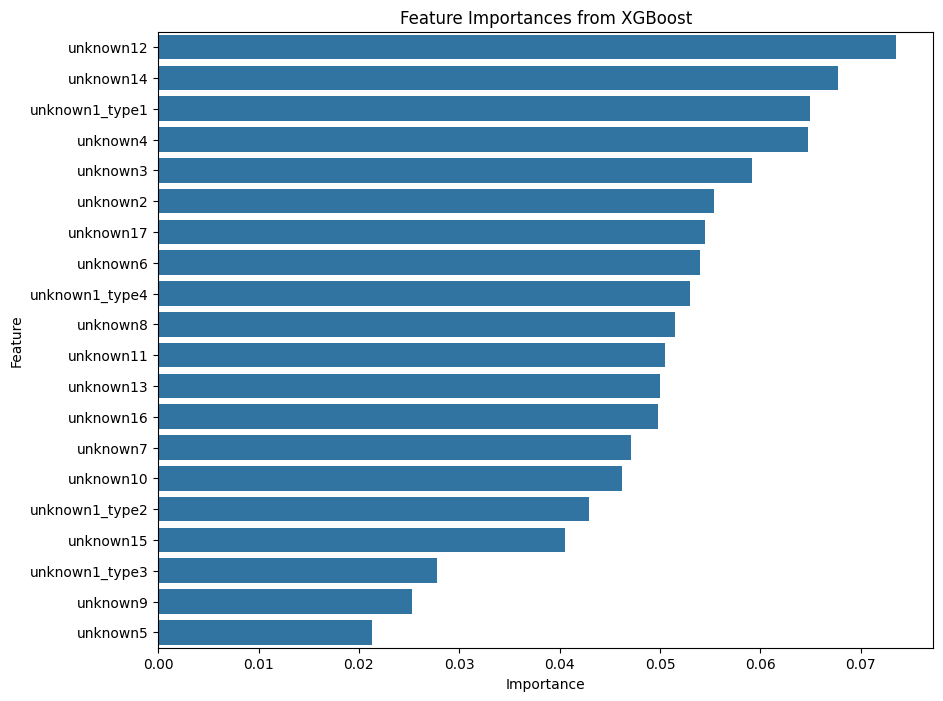

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
# import numpy as np  # 필요할 경우 추가


# # 데이터 로드
# df = pd.read_csv("../../bigfile/data_week3.csv")  # 여기에 데이터 경로 입력

# # 데이터 전처리 및 샘플링
# df_encoded = pd.get_dummies(df, columns=['unknown1'])
# X = df_encoded.drop('target', axis=1)
# y = df_encoded['target']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Under-sampling 적용
# rus = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# # XGBoost 모델 훈련
# xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train_resampled, y_train_resampled)

# # 변수 중요도 추출
# feature_importances = xgb_model.feature_importances_

# # 변수 중요도 시각화
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# # 시각화
# plt.figure(figsize=(10, 8))
# sns.barplot(x='Importance', y='Feature', data=importance_df)
# plt.title('Feature Importances from XGBoost')
# plt.show()